In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


In [2]:
# Specify the path of the directory you want to list
directory_path = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic'

# Use os.listdir() to get a list of all the files and directories in the specified directory
directories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

print("List of directories:")
for directory in directories:
    print(directory)

List of directories:
MC15ri_etaetapip_pre_sel_240307_v2
MC15ri_etaetapip_pre_sel_240310_treefit
MC15ri_etaetapip_pre_sel_240310_treefit_kfiteta


In [3]:
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_cut_240229/'
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240306/'
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240310_treefit/'


In [4]:
generic_ccbar = base_file_loc + 'ccbar/*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + 'uubar/*.root'
generic_ddbar = base_file_loc + 'ddbar/*.root'
generic_ssbar = base_file_loc + 'ssbar/*.root'
generic_charged = base_file_loc + 'charged/*.root'
generic_mixed = base_file_loc + 'mixed/*.root'
generic_taupair = base_file_loc + 'taupair/*.root'

In [8]:
import ROOT
test_file = base_file_loc + 'ccbar/pre_sel_240310_treefit_ccbar_output_02897_job393514088_00.root'
# Open the ROOT file containing the ntuple
file = ROOT.TFile(test_file)

# Access the ntuple
ntuple = file.Get("etapip_gg")

# Get the list of branches (variable names) in the ntuple
branches = ntuple.GetListOfBranches()

# Extract the variable names from the branches
variable_names = [branch.GetName() for branch in branches]

# Print the variable names
print("Variable names in the ntuple:")
# for name in variable_names:
#     print(name)
print(variable_names)

Variable names in the ntuple:
['__experiment__', '__run__', '__event__', '__production__', '__candidate__', '__ncandidates__', '__weight__', 'Dp_M', 'Dp_ErrM', 'Dp_SigM', 'Dp_InvM', 'Dp_px', 'Dp_py', 'Dp_pz', 'Dp_pt', 'Dp_p', 'Dp_E', 'Dp_genMotherID', 'Dp_genMotherP', 'Dp_genMotherPDG', 'Dp_genParticleID', 'Dp_isCloneTrack', 'Dp_mcDecayVertexX', 'Dp_mcDecayVertexY', 'Dp_mcDecayVertexZ', 'Dp_mcDecayTime', 'Dp_mcE', 'Dp_mcErrors', 'Dp_mcInitial', 'Dp_mcP', 'Dp_mcPDG', 'Dp_mcPT', 'Dp_mcPX', 'Dp_mcPY', 'Dp_mcPZ', 'Dp_mcPhi', 'Dp_mcVirtual', 'Dp_nMCMatches', 'Dp_isMisidentified', 'Dp_charge', 'Dp_isSignal', 'Dp_CMS_p', 'Dp_CMS_E', 'Dp_CMS_cosTheta', 'Dp_distance', 'Dp_significanceOfDistance', 'Dp_dx', 'Dp_dy', 'Dp_dz', 'Dp_x', 'Dp_y', 'Dp_z', 'Dp_x_uncertainty', 'Dp_y_uncertainty', 'Dp_z_uncertainty', 'Dp_dr', 'Dp_dphi', 'Dp_dcosTheta', 'Dp_prodVertexX', 'Dp_prodVertexY', 'Dp_prodVertexZ', 'Dp_prodVertexXErr', 'Dp_prodVertexYErr', 'Dp_prodVertexZErr', 'Dp_chiProb', 'Dp_flightTime', 'Dp_flig

In [9]:
base_filter=' Dp_M>0'
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '

In [7]:
tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask']



In [8]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

input_line_87:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_98:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_105:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [33]:
pd_ccbar_1 = pd_ccbar_0.query("etapip_Eta_isSignal==1")

(1.6, 2.1)

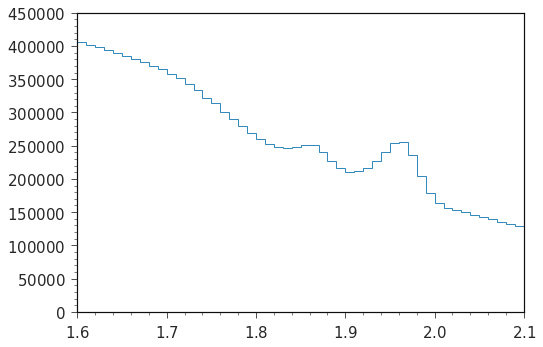

In [77]:
plt.hist(pd_ccbar_0.Dp_M,bins=np.linspace(1.6,2.1,51), histtype='step')
plt.xlim(1.6,2.1)

(1.6, 2.1)

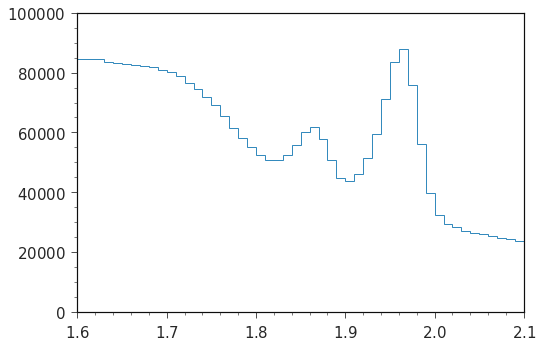

In [16]:
plt.hist(pd_ccbar_0.Dp_M,bins=np.linspace(1.6,2.1,51), histtype='step')
plt.xlim(1.6,2.1)

In [9]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [10]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

30991157
47727656
0.6493333131633365


In [31]:
cut = 'Dp_M>0.0'
cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [32]:
# Extract the directory from the file path
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/Dpetapip_gg"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [33]:

var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.6,2.1)
nbins=50
img_path=''
xlabel=''

In [34]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,force_range=tuple() ):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity=luminosity,force_range=force_range)
    plt.tight_layout()

    plt.savefig(img_path)

In [35]:
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

[23137. 23782. 23766. 23154. 23256. 22954. 22805. 22491. 22655. 22073.
 21697. 21290. 20729. 20014. 19278. 18594. 17732. 16877. 15957. 15239.
 14782. 14671. 14682. 15309. 16152. 17457. 17652. 16865. 14794. 12887.
 12369. 12457. 13057. 14263. 15955. 17802. 18444. 16440. 13283. 10794.
  9547.  9183.  8813.  8542.  8533.  8422.  8180.  7958.  7735.  7712.]
fitst_bin_entries=23137.0


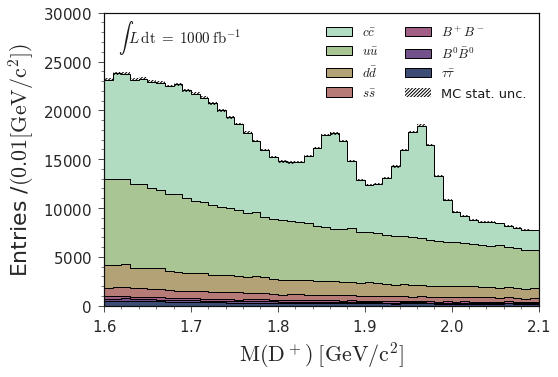

In [36]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[106258. 105129. 103722. 103459. 102817. 101991. 101639. 100103. 100007.
  98370.  97510.  96230.  93651.  91814.  88324.  85591.  81963.  78859.
  75151.  72884.  70278.  68825.  69164.  70783.  73212.  77038.  78914.
  74804.  68896.  63732.  62747.  64545.  69611.  76840.  87402.  98122.
 102739.  91922.  73522.  60147.  53605.  51712.  50787.  50284.  49624.
  49219.  48660.  48622.  48130.  47376.]
fitst_bin_entries=106258.0


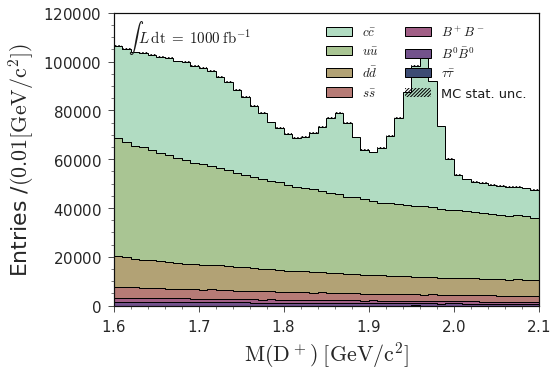

In [124]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM.png"
img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[     0.      0.      0.      0.      0.      0.      0.      0.      0.
      0. 419280. 389370. 364487. 338350. 314692. 292848. 273484. 255308.
 235419. 219509. 203844. 189617. 176353. 162807. 149727. 138675. 127356.
 117388. 108442.  98932.  90272.  82474.  74584.  67654.  60686.  54951.
  48890.  43699.  38356.  33859.  29154.  25371.  21474.  18395.  15334.
  12749.  10112.   8475.   6746.   5279.]
fitst_bin_entries=0.0


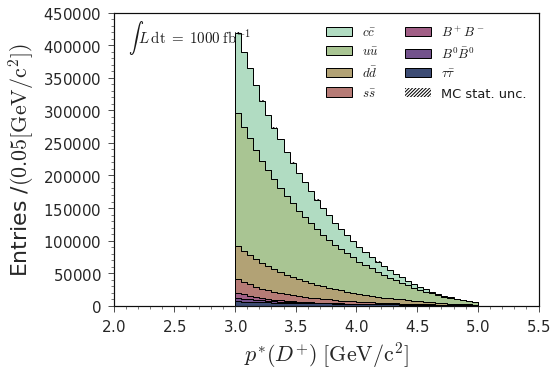

In [113]:
var = 'Dp_CMS_p'
xrange = (2.5,5)
nbins = 50
xlabel = r"$p^{*}(D^{+})$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpCMSp.png"
img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 913486.  915401.  920561.  924043.  927923.  933250.  938529.  945941.
  953892.  960001.  967499.  975988.  986471.  996243. 1006985. 1019517.
 1030246. 1045713. 1058891. 1073577. 1083096. 1100889. 1113090. 1124111.
 1137589. 1145507. 1155322. 1162019. 1162330. 1166219. 1161494. 1156567.
 1148410. 1136912. 1123767. 1109590. 1092408. 1073265. 1056337. 1035936.
 1019613. 1002190.  986888.  972904.  958827.  945612.  937090.  927973.
  923287.  914506.]
fitst_bin_entries=913486.0


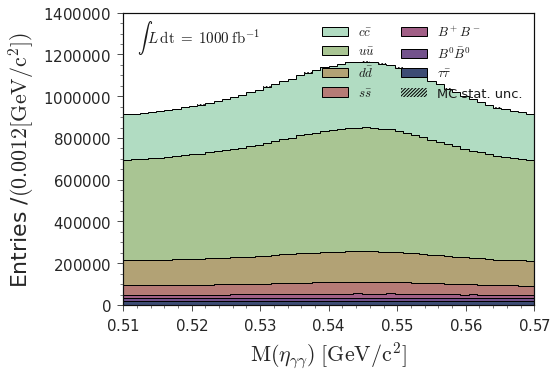

In [86]:
var = 'etapip_Eta_M'
xrange = (0.51,0.57)
nbins = 50
xlabel = "$\mathrm{M(\eta_{\gamma\gamma})}$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etaM.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[2425345. 2046122. 1770898. 1569728. 1411000. 1269118. 1150976. 1065570.
 1002716.  982729.  993797. 1062996. 1215406. 1395202. 1540899. 1652498.
 1725710. 1768818. 1793733. 1798559. 1788977. 1768365. 1737076. 1686809.
 1629775. 1561952. 1479618. 1386838. 1260369. 1108083.  953520.  813114.
  698072.  598273.  514157.  439886.  376023.  322044.  275362.  234700.
  201142.  171860.  147820.  126158.  107624.   90261.   76535.   64819.
   53889.   45251.]
fitst_bin_entries=2425345.0


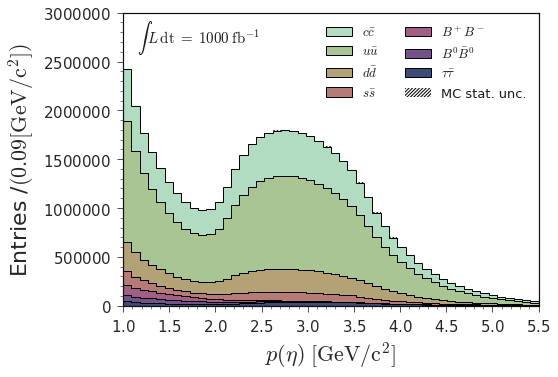

In [87]:
var = 'etapip_Eta_p'
xrange = (1,5.5)
nbins = 50
xlabel = r"$p(\eta)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_Eta_p.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[ 784953.  785295.  781139.  778520.  774836.  772367.  767699.  765395.
  766013.  768337.  781419.  801776.  827334.  868844.  923158.  997648.
 1100813. 1212248. 1298549. 1397976. 1574569. 1880842. 1806136. 1460609.
 1351511. 1349846. 1454375. 1762989. 1784957. 1509593. 1351347. 1260005.
 1178272. 1068839.  972977.  903341.  852258.  813566.  787237.  770533.
  759949.  756330.  757648.  760187.  763052.  767438.  771218.  777863.
  781607.  784492.]
fitst_bin_entries=784953.0


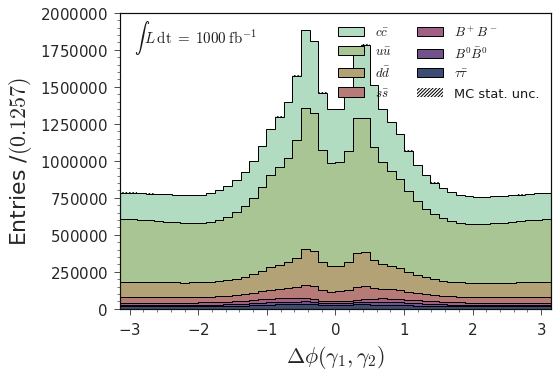

In [88]:
var = 'etapip_Eta_daughterDiffOfPhi_0_1'

xrange = (-math.pi,math.pi)
nbins = 50
xlabel = r"$\Delta \phi(\gamma_1,\gamma_2)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_Eta_daughterDiffOfPhi_0_1.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[      0.       0.    3436.  212110. 1106599. 2050229. 2171661. 1962287.
 1697861. 1600071. 1623678. 1694652. 1787913. 1870066. 1927353. 1911976.
 1740445. 1595195. 1498931. 1438850. 1396550. 1370041. 1338454. 1310825.
 1272290. 1237483. 1193147. 1146793. 1096361. 1047910. 1001917.  963250.
  930965.  900613.  864008.  820401.  769550.  716555.  664466.  613674.
  555176.  499704.  446868.  392989.  334873.  274658.  211851.  147358.
   87489.   28373.]
fitst_bin_entries=0.0


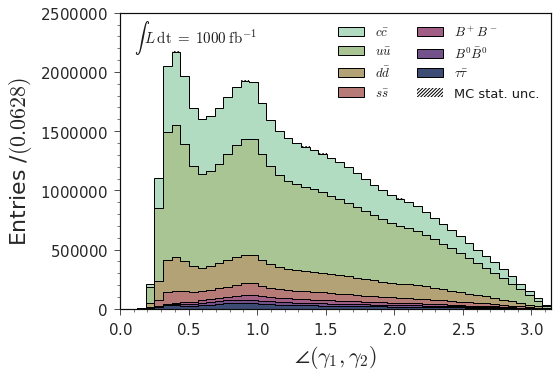

In [89]:
var = 'etapip_Eta_daughterAngle_0_1'

xrange = (0,math.pi)
nbins = 50
xlabel = r"$\angle(\gamma_1,\gamma_2)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_Eta_daughterAngle_0_1.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[0.000000e+00 0.000000e+00 0.000000e+00 9.789470e+05 8.341800e+04
 2.197991e+06 2.689860e+05 3.148462e+06 6.034350e+05 4.653320e+05
 3.493356e+06 4.057390e+05 3.113719e+06 3.071410e+05 2.508699e+06
 2.224340e+05 1.984197e+06 1.683541e+06 1.612350e+05 1.568848e+06
 1.812410e+05 1.649619e+06 2.388770e+05 1.889419e+06 3.351650e+05
 6.288120e+05 2.260535e+06 5.608340e+05 2.663344e+06 6.268760e+05
 2.982653e+06 6.265250e+05 3.143651e+06 3.231910e+06 3.938330e+05
 2.846705e+06 2.374880e+05 2.125296e+06 9.931200e+04 1.191593e+06
 2.365400e+04 6.912200e+04 3.224420e+05 4.320000e+02 3.087000e+03
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
fitst_bin_entries=0.0


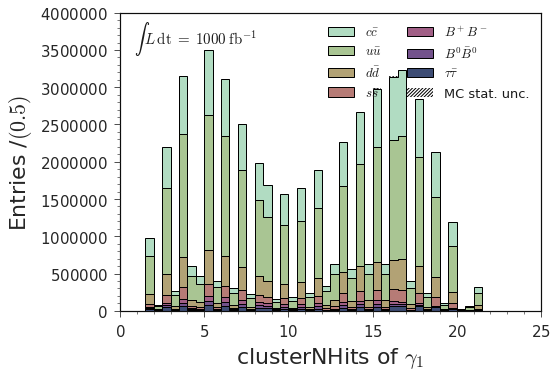

In [90]:
var = 'etapip_gamma1_clusterNHits'

xrange = (0,25)
nbins = 50
xlabel = r"clusterNHits of $\gamma_1$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma1_clusterNHits.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[      0.       0.       0. 1144385.  106296. 2329279.  303500. 3015123.
  592392.  447104. 2986650.  360287. 2481793.  263915. 1939044.  189667.
 1552296. 1375017.  139877. 1364831.  161789. 1541645.  219525. 1860304.
  314796.  598545. 2304796.  554248. 2751083.  654982. 3138676.  701532.
 3422202. 3672308.  496682. 3423440.  315734. 2627769.  136985. 1467100.
   36252.  100239.  410357.    3696.   21764.       0.       0.       0.
       0.       0.]
fitst_bin_entries=0.0


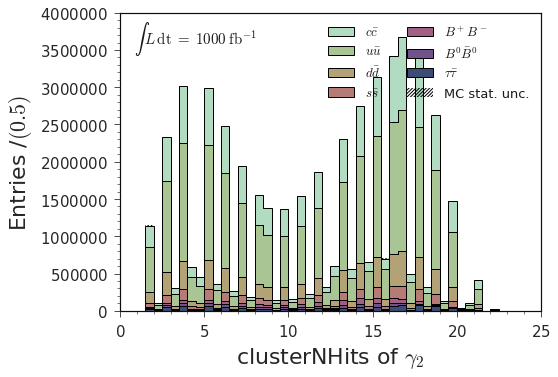

In [91]:
var = 'etapip_gamma2_clusterNHits'

xrange = (0,25)
nbins = 50
xlabel = r"clusterNHits of $\gamma_2$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma2_clusterNHits.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[10680338.  5591062.  2555059.  1506993.  1057516.   841436.   744274.
   682950.   651259.   642316.   664440.   710470.   834758.  1097173.
  1001596.   902923.   834987.   790944.   742165.   695733.   668280.
   644653.   634170.   650530.   660306.   701620.   763490.   826469.
   866351.   883568.   882597.   872353.   847786.   818350.   781876.
   737187.   687315.   637307.   584757.   531356.   475715.   427288.
   375039.   330081.   285585.   246964.   214348.   183193.   158564.
   136311.]
fitst_bin_entries=10680338.0


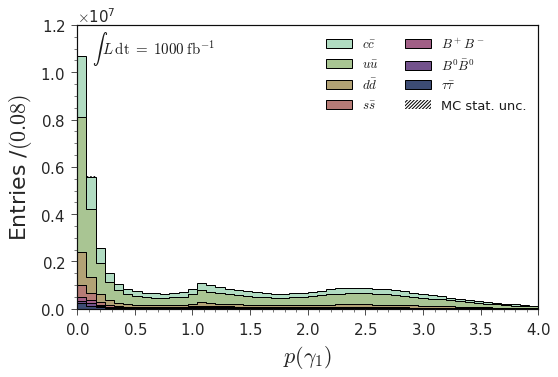

In [92]:
var = 'etapip_gamma1_p'

xrange = (0,4)
nbins = 50
xlabel = r"$p(\gamma_1)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma1_p.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[9560429. 4924635. 2193792. 1314010.  913597.  737843.  667591.  624488.
  604830.  610693.  690036.  719082.  912920. 1290571. 1208686. 1083360.
  994709.  918587.  844452.  781862.  723286.  678218.  639154.  612357.
  591732.  582786.  582333.  588338.  600313.  616769.  630483.  645149.
  658267.  672759.  684208.  697649.  707763.  709378.  708729.  698762.
  681767.  658255.  630096.  593238.  540103.  482689.  422533.  369202.
  320025.  279960.]
fitst_bin_entries=9560429.0


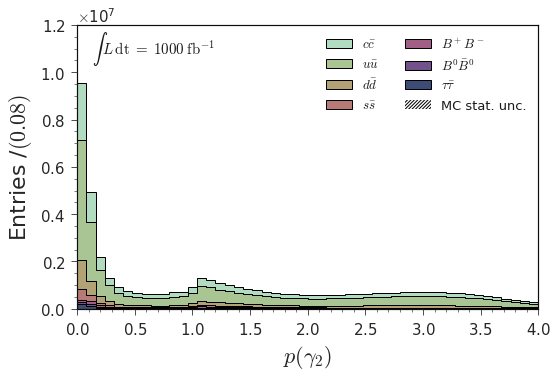

In [93]:
var = 'etapip_gamma2_p'

xrange = (0,4)
nbins = 50
xlabel = r"$p(\gamma_2)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma2_p.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[      0. 3832383. 4186054. 2661901. 1525423. 1774676. 1278053. 1012910.
  811361.  660884.  581836.  500978.  433251.  385802.  356159.  331781.
  297871.  271040.  251662.  236943.  224772.  212742.  204226.  199696.
  194970.  187599.  182503.  179202.  174782.  171616.  168860.  167692.
  164771.  162855.  161836.  161797.  161451.  160823.  159614.  160428.
  164732.  167361.  165156.  167191.  172530.  176780.  178157.  183003.
  190023.  199071.]
fitst_bin_entries=0.0


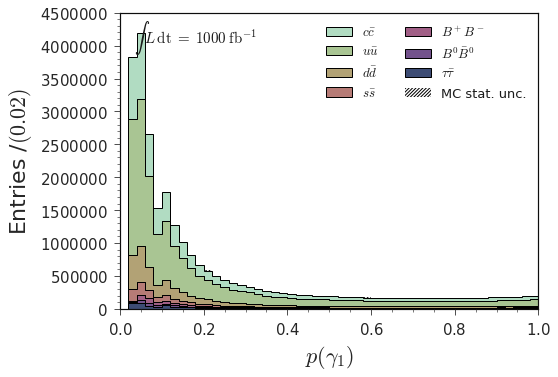

In [94]:
var = 'etapip_gamma1_p'

xrange = (0,1)
nbins = 50
xlabel = r"$p(\gamma_1)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma1_p_zoom.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[      0. 3895513. 3327490. 2337426. 1347178. 1594393. 1123136.  859928.
  685111.  562343.  504360.  441978.  376914.  335760.  307955.  293381.
  257616.  233475.  217452.  205054.  194248.  186497.  179961.  177137.
  174007.  168402.  164779.  160403.  158199.  156378.  155180.  154731.
  152717.  151150.  151023.  149940.  150896.  151728.  152836.  155233.
  174573.  184943.  165840.  164680.  169915.  176359.  182708.  190100.
  201474.  216114.]
fitst_bin_entries=0.0


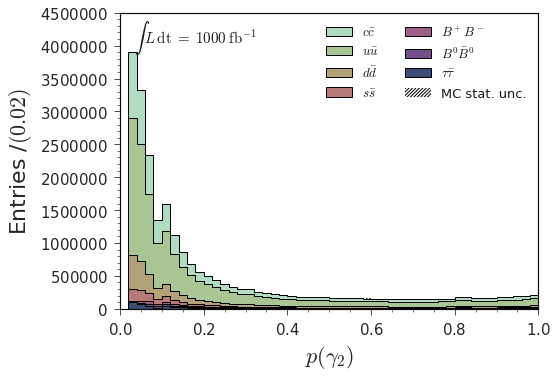

In [95]:
var = 'etapip_gamma2_p'

xrange = (0,1)
nbins = 50
xlabel = r"$p(\gamma_2)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma2_p_zoom.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[       0.        0.        0.        0.        0.   432282.   420392.
   416674.   434864.   439749.   463238.   486922.   523111.   558660.
   602502.   654250.   736970.   797867.   848564.   949779.   906099.
   927229.   969302.   926864.   898930.   816331.   775043.   743679.
   719782.   698573.   679858.   647321.   599224.   555392.   526227.
   504186.   488861.   481860.   476812.   477279.   483283.   495199.
   510490.   546983.   604101.   694829.   851785.  1140677.  3959250.
 19656632.]
fitst_bin_entries=0.0


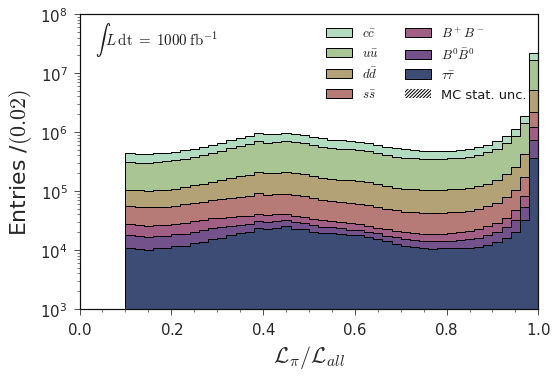

In [96]:
var = 'Pip_pionID'

xrange = (0,1)
nbins = 50
xlabel = r"$\mathcal{L}_{\pi}/\mathcal{L}_{all}$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_Pip_pionID.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.yscale('log')
plt.tight_layout()

plt.savefig(img_path)

[4.4031686e+07 2.2530390e+06 8.0743800e+05 4.9058000e+05 3.6269100e+05
 2.9006600e+05 2.4104200e+05 2.0535600e+05 1.7975000e+05 1.5877100e+05
 1.4319300e+05 1.2988900e+05 1.1921700e+05 1.1053300e+05 1.0241100e+05
 9.7037000e+04 9.0576000e+04 8.5725000e+04 8.2016000e+04 7.8308000e+04
 7.4353000e+04 7.1635000e+04 6.8497000e+04 6.5318000e+04 6.3000000e+04
 6.0926000e+04 5.9281000e+04 5.7630000e+04 5.5824000e+04 5.3692000e+04
 5.1871000e+04 5.0365000e+04 4.9499000e+04 4.7462000e+04 4.6484000e+04
 4.5268000e+04 4.4169000e+04 4.2762000e+04 4.2338000e+04 4.0761000e+04
 4.0160000e+04 3.9369000e+04 3.8974000e+04 3.8570000e+04 3.7890000e+04
 3.7785000e+04 3.6549000e+04 3.6576000e+04 3.6061000e+04 3.5512000e+04]
fitst_bin_entries=44031686.0


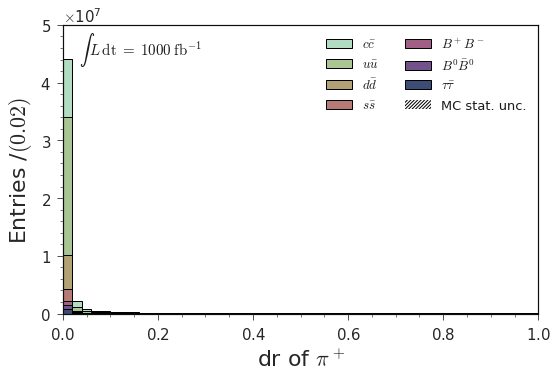

In [97]:
var = 'Pip_dr'

xrange = (0,1)
nbins = 50
xlabel = r"dr of $\pi^+$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_Pip_dr.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

In [98]:
var = 'Pip_dz'

xrange = (-3,3)
nbins = 50
xlabel = r"dz of $\pi^+$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_Pip_dz.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

KeyError: 'Pip_dz'